<a href="https://colab.research.google.com/github/Sajithpemarathna/Energy-Consumption-Data-in-Germany-1995-2020-/blob/main/Model_Implementation_Attempt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/sample_data/Use of Energy of Energy Carriers.csv"
df = pd.read_csv(file_path, encoding="latin1")  # Adjust encoding if necessary

# Display first few rows to understand the structure
print("Dataset Columns:\n", df.columns)
print("\nFirst 5 Rows:\n", df.head())


Dataset Columns:
 Index(['ï»¿Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

First 5 Rows:
   ï»¿Branch Code                              Homogeneous Branches  \
0       CPA08-01  Products of agric., hunting and related services   
1       CPA08-01  Products of agric., hunting and related services   
2       CPA08-01  Products of agric., hunting and related services   
3       CPA08-01  Products of agric., hunting and related services   
4       CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers   1995   1996   1997   1998  \
0              Hard coal and hard coal products    888    946    829   1071   
1  Brown coal (lignite) and brown coal products   1477   1346   127

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/sample_data/Use of Energy of Energy Carriers.csv"
df = pd.read_csv(file_path, encoding="latin1")  # Adjust encoding if necessary

# Convert wide format (Years as columns) to long format
df_melted = df.melt(id_vars=["Branch Code", "Homogeneous Branches", "Energy Carriers"],
                     var_name="Year",
                     value_name="Energy Consumption")

# Convert Year column to integer
df_melted["Year"] = df_melted["Year"].astype(int)

# Display transformed data
print("\nTransformed Dataset:\n", df_melted.head())


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Branch Code']"

In [ ]:
print(df.columns)


Index(['ï»¿Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


In [ ]:
# Clean column names by stripping unwanted characters
df.columns = df.columns.str.replace("ï»¿", "").str.strip()

# Check column names again
print(df.columns)


Index(['Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


In [ ]:
df_melted = df.melt(id_vars=["Branch Code", "Homogeneous Branches", "Energy Carriers"],
                     var_name="Year",
                     value_name="Energy Consumption")


In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/sample_data/Use of Energy of Energy Carriers.csv"

df = pd.read_csv(file_path, encoding="latin1")  # Adjust encoding if necessary

# Convert wide format (Years as columns) to long format
df_melted = df.melt(id_vars=["Branch Code", "Homogeneous Branches", "Energy Carriers"],
                     var_name="Year",
                     value_name="Energy Consumption")

# Convert Year column to integer
df_melted["Year"] = df_melted["Year"].astype(int)

# Display transformed data
print("\nTransformed Dataset:\n", df_melted.head())


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Branch Code']"

In [ ]:
print(df.columns.tolist())  # Show all column names in a list


['ï»¿Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [ ]:
# Remove hidden characters and extra spaces
df.columns = df.columns.str.replace("ï»¿", "").str.strip()

# Verify after cleaning
print(df.columns.tolist())


['Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [ ]:
df_melted = df.melt(
    id_vars=[df.columns[0], df.columns[1], df.columns[2]],  # Use actual names
    var_name="Year",
    value_name="Energy Consumption"
)

# Convert Year column to integer
df_melted["Year"] = df_melted["Year"].astype(int)

# Display transformed data
print(df_melted.head())


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers  Year  Energy Consumption  
0              Hard coal and hard coal products  1995                 888  
1  Brown coal (lignite) and brown coal products  1995                1477  
2                                     Crude oil  1995                   0  
3                                        Petrol  1995                4580  
4                                  Diesel fuels  1995               94156  


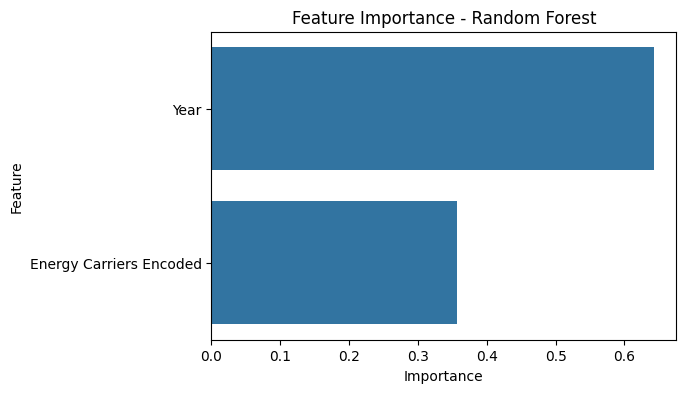

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical feature (Energy Carriers)
label_encoder = LabelEncoder()
df_melted["Energy Carriers Encoded"] = label_encoder.fit_transform(df_melted["Energy Carriers"])

# Prepare dataset for feature selection
X = df_melted[["Year", "Energy Carriers Encoded"]]
y = df_melted["Energy Consumption"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Display feature importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importance - Random Forest")
plt.show()


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import math

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = math.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\nXGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")



XGBoost Model Evaluation:
MSE: 69148631040.00, RMSE: 262961.27, MAPE: 50329537831027867648.0000


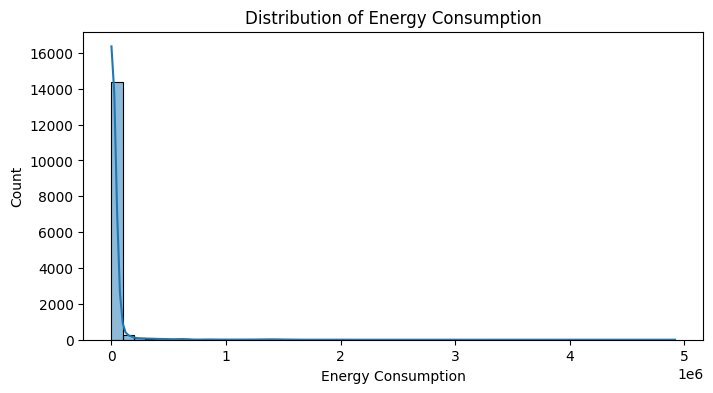

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Energy Consumption
plt.figure(figsize=(8, 4))
sns.histplot(df_melted["Energy Consumption"], bins=50, kde=True)
plt.title("Distribution of Energy Consumption")
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


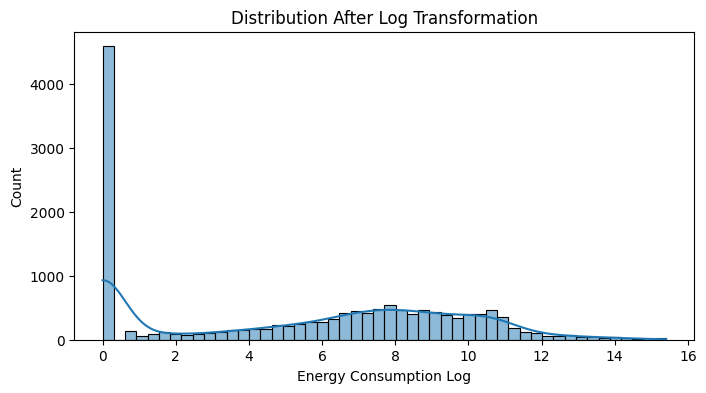

In [ ]:
import numpy as np

# Apply log transformation (to smooth large values)
df_melted["Energy Consumption Log"] = np.log1p(df_melted["Energy Consumption"])

# Check distribution again
plt.figure(figsize=(8, 4))
sns.histplot(df_melted["Energy Consumption Log"], bins=50, kde=True)
plt.title("Distribution After Log Transformation")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the Year and Encoded Energy Carriers
scaler = MinMaxScaler()
df_melted[["Year", "Energy Carriers Encoded"]] = scaler.fit_transform(df_melted[["Year", "Energy Carriers Encoded"]])


In [ ]:
import numpy as np

# Replace zero or negative values with a small positive number (to avoid log issues)
df_melted["Energy Consumption Adjusted"] = df_melted["Energy Consumption"].replace(0, 1)  # Replace 0 with 1
df_melted["Energy Consumption Adjusted"] = df_melted["Energy Consumption Adjusted"].clip(lower=1)  # Ensure no negatives

# Apply log transformation again
df_melted["Energy Consumption Log"] = np.log1p(df_melted["Energy Consumption Adjusted"])


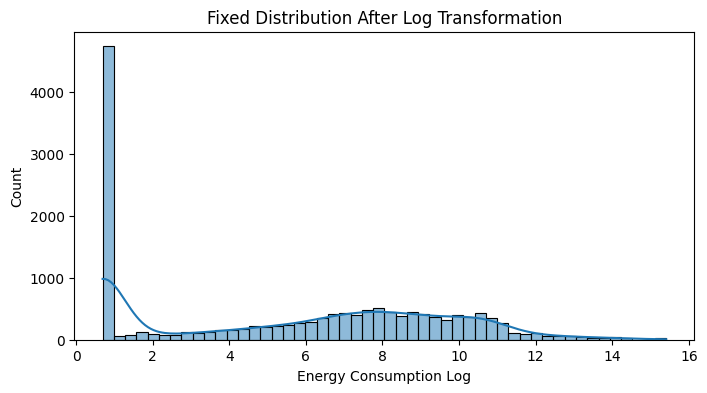

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df_melted["Energy Consumption Log"], bins=50, kde=True)
plt.title("Fixed Distribution After Log Transformation")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize Year and Encoded Energy Carriers
scaler = MinMaxScaler()
df_melted[["Year", "Energy Carriers Encoded"]] = scaler.fit_transform(df_melted[["Year", "Energy Carriers Encoded"]])


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import math

# Prepare dataset
X = df_melted[["Year", "Energy Carriers Encoded"]]
y = df_melted["Energy Consumption Log"]  # Use log-transformed target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost with improved dataset
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original scale
y_pred_xgb_original = np.expm1(y_pred_xgb)
y_test_original = np.expm1(y_test)

# Evaluate model
mse_xgb = mean_squared_error(y_test_original, y_pred_xgb_original)
rmse_xgb = math.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test_original, y_pred_xgb_original)

print("\nImproved XGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")



Improved XGBoost Model Evaluation:
MSE: 71019980772.41, RMSE: 266495.74, MAPE: 123.9952


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% reserved for validation+test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split remaining 30% into 15% validation and 15% test

# Print dataset sizes
print(f"Train set size: {len(X_train)}, Validation set size: {len(X_valid)}, Test set size: {len(X_test)}")


Train set size: 10483, Validation set size: 2246, Test set size: 2247


In [ ]:
import xgboost as xgb

# Train XGBoost model with validation set
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],  # Use validation set
    eval_metric="rmse",
    early_stopping_rounds=20,  # Stops training if no improvement after 20 rounds
    verbose=True
)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original scale
y_pred_xgb_original = np.expm1(y_pred_xgb)
y_test_original = np.expm1(y_test)

# Evaluate model
mse_xgb = mean_squared_error(y_test_original, y_pred_xgb_original)
rmse_xgb = math.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test_original, y_pred_xgb_original)

print("\nFinal XGBoost Model Evaluation (with Validation):")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")


TypeError: XGBModel.fit() got an unexpected keyword argument 'eval_metric'

In [ ]:
import xgboost as xgb

# Create XGBoost model with validation set
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# Train XGBoost model with early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],  # Use validation set
    early_stopping_rounds=20,  # Stop training if no improvement after 20 rounds
    verbose=True
)


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
import xgboost as xgb

# Convert dataset into DMatrix (required for xgb.train)
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 5,
    "random_state": 42
}

# Train XGBoost with validation and early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=[(dtrain, "train"), (dvalid, "valid")],  # Validation set
    early_stopping_rounds=20,  # Stop if no improvement in 20 rounds
    verbose_eval=True
)

# Make predictions on test set
y_pred_xgb = xgb_model.predict(dtest)

# Convert predictions back to original scale
y_pred_xgb_original = np.expm1(y_pred_xgb)
y_test_original = np.expm1(y_test)

# Evaluate model
mse_xgb = mean_squared_error(y_test_original, y_pred_xgb_original)
rmse_xgb = math.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test_original, y_pred_xgb_original)

print("\nFinal XGBoost Model Evaluation (with Validation & Early Stopping):")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")


[0]	train-rmse:3.86967	valid-rmse:3.96084
[1]	train-rmse:3.77911	valid-rmse:3.87298
[2]	train-rmse:3.69546	valid-rmse:3.79220
[3]	train-rmse:3.61829	valid-rmse:3.71816
[4]	train-rmse:3.54509	valid-rmse:3.64823
[5]	train-rmse:3.47728	valid-rmse:3.58390
[6]	train-rmse:3.41493	valid-rmse:3.52503
[7]	train-rmse:3.35792	valid-rmse:3.47163
[8]	train-rmse:3.30531	valid-rmse:3.42260
[9]	train-rmse:3.25708	valid-rmse:3.37796
[10]	train-rmse:3.21315	valid-rmse:3.33771
[11]	train-rmse:3.17272	valid-rmse:3.30082
[12]	train-rmse:3.13577	valid-rmse:3.26738
[13]	train-rmse:3.10221	valid-rmse:3.23730
[14]	train-rmse:3.07141	valid-rmse:3.20990
[15]	train-rmse:3.04348	valid-rmse:3.18544
[16]	train-rmse:3.01787	valid-rmse:3.16313
[17]	train-rmse:2.99583	valid-rmse:3.14418
[18]	train-rmse:2.97579	valid-rmse:3.12706
[19]	train-rmse:2.95757	valid-rmse:3.11182
[20]	train-rmse:2.94102	valid-rmse:3.09799
[21]	train-rmse:2.92452	valid-rmse:3.08455
[22]	train-rmse:2.91084	valid-rmse:3.07348
[23]	train-rmse:2.898

In [ ]:
# Make predictions on test set
y_pred_xgb = xgb_model.predict(dtest)

# Convert predictions back to original scale
y_pred_xgb_original = np.expm1(y_pred_xgb)
y_test_original = np.expm1(y_test)

# Evaluate model
mse_xgb = mean_squared_error(y_test_original, y_pred_xgb_original)
rmse_xgb = math.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test_original, y_pred_xgb_original)

print("\nFinal XGBoost Model Evaluation (Test Set):")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")



Final XGBoost Model Evaluation (Test Set):
MSE: 71241735063.11, RMSE: 266911.47, MAPE: 157.1987


In [ ]:
# Sort data by Energy Carrier and Year
df_melted = df_melted.sort_values(by=["Energy Carriers", "Year"])

# Add a moving average feature (3-year window)
df_melted["Energy Consumption MA3"] = df_melted.groupby("Energy Carriers")["Energy Consumption"].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Update feature set
X["Energy Consumption MA3"] = df_melted["Energy Consumption MA3"]


<ipython-input-25-7cf27e33ec09>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Energy Consumption MA3"] = df_melted["Energy Consumption MA3"]


In [ ]:
# Convert predictions back using exponential transformation but prevent extreme values
y_pred_xgb_original = np.clip(np.expm1(y_pred_xgb), 0, None)  # Prevent negative values
y_test_original = np.clip(np.expm1(y_test), 0, None)  # Ensure test data stays positive


In [ ]:
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.03,  # Lower learning rate for smoother updates
    "max_depth": 6,  # Slightly deeper trees
    "subsample": 0.8,  # Prevent overfitting
    "colsample_bytree": 0.8,
    "random_state": 42
}

# Retrain the model
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,  # More rounds for stability
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=30,
    verbose_eval=True
)


[0]	train-rmse:3.90905	valid-rmse:3.99915
[1]	train-rmse:3.90877	valid-rmse:3.99902
[2]	train-rmse:3.90853	valid-rmse:3.99900
[3]	train-rmse:3.85334	valid-rmse:3.94526
[4]	train-rmse:3.80060	valid-rmse:3.89405
[5]	train-rmse:3.75016	valid-rmse:3.84528
[6]	train-rmse:3.70181	valid-rmse:3.79868
[7]	train-rmse:3.65606	valid-rmse:3.75479
[8]	train-rmse:3.65585	valid-rmse:3.75471
[9]	train-rmse:3.61198	valid-rmse:3.71268
[10]	train-rmse:3.61175	valid-rmse:3.71260
[11]	train-rmse:3.57011	valid-rmse:3.67284
[12]	train-rmse:3.56992	valid-rmse:3.67275
[13]	train-rmse:3.53008	valid-rmse:3.63487
[14]	train-rmse:3.52985	valid-rmse:3.63490
[15]	train-rmse:3.49231	valid-rmse:3.59934
[16]	train-rmse:3.45629	valid-rmse:3.56536
[17]	train-rmse:3.42231	valid-rmse:3.53335
[18]	train-rmse:3.42212	valid-rmse:3.53331
[19]	train-rmse:3.38943	valid-rmse:3.50275
[20]	train-rmse:3.38923	valid-rmse:3.50277
[21]	train-rmse:3.38905	valid-rmse:3.50270
[22]	train-rmse:3.35837	valid-rmse:3.47406
[23]	train-rmse:3.358

In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Convert predictions back to original scale (apply exponential transformation)
y_pred_xgb_original = np.clip(np.expm1(y_pred_xgb), 0, None)  # Ensure no negative values
y_test_original = np.clip(np.expm1(y_test), 0, None)

# Evaluate model on test data
mse_xgb = mean_squared_error(y_test_original, y_pred_xgb_original)
rmse_xgb = math.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test_original, y_pred_xgb_original)

print("\nFinal XGBoost Model Evaluation (Test Set):")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")



Final XGBoost Model Evaluation (Test Set):
MSE: 71257374641.58, RMSE: 266940.77, MAPE: 150.8358


In [ ]:
# Add Lag Features (previous years' energy consumption)
df_melted["Energy Consumption Lag1"] = df_melted.groupby("Energy Carriers")["Energy Consumption"].shift(1)
df_melted["Energy Consumption Lag2"] = df_melted.groupby("Energy Carriers")["Energy Consumption"].shift(2)
df_melted["Energy Consumption Lag3"] = df_melted.groupby("Energy Carriers")["Energy Consumption"].shift(3)

# Fill missing values with the moving average
df_melted.fillna(df_melted["Energy Consumption MA3"], inplace=True)


In [ ]:
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "alpha": 0.5,  # Huber loss (reduces sensitivity to outliers)
    "random_state": 42
}


In [ ]:
# Update feature set
X = df_melted[["Year", "Energy Carriers Encoded", "Energy Consumption MA3", "Energy Consumption Lag1", "Energy Consumption Lag2", "Energy Consumption Lag3"]]

# Train-test-validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Retrain with new features
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=30,
    verbose_eval=True
)


[0]	train-rmse:3.95436	valid-rmse:4.04680
[1]	train-rmse:3.94406	valid-rmse:4.03855
[2]	train-rmse:3.93241	valid-rmse:4.03085
[3]	train-rmse:3.92282	valid-rmse:4.02332
[4]	train-rmse:3.91387	valid-rmse:4.01648
[5]	train-rmse:3.90705	valid-rmse:4.01127
[6]	train-rmse:3.89836	valid-rmse:4.00404
[7]	train-rmse:3.88990	valid-rmse:3.99743
[8]	train-rmse:3.88215	valid-rmse:3.99121
[9]	train-rmse:3.87387	valid-rmse:3.98531
[10]	train-rmse:3.86494	valid-rmse:3.97734
[11]	train-rmse:3.85868	valid-rmse:3.97370
[12]	train-rmse:3.84991	valid-rmse:3.96793
[13]	train-rmse:3.84271	valid-rmse:3.96274
[14]	train-rmse:3.83580	valid-rmse:3.95712
[15]	train-rmse:3.82876	valid-rmse:3.95272
[16]	train-rmse:3.82052	valid-rmse:3.94693
[17]	train-rmse:3.81259	valid-rmse:3.94139
[18]	train-rmse:3.80457	valid-rmse:3.93631
[19]	train-rmse:3.79897	valid-rmse:3.93280
[20]	train-rmse:3.79232	valid-rmse:3.92873
[21]	train-rmse:3.78609	valid-rmse:3.92364
[22]	train-rmse:3.78049	valid-rmse:3.91948
[23]	train-rmse:3.775

In [ ]:
# Predict on test set
y_pred_xgb = xgb_model.predict(dtest)

# Convert back to original scale
y_pred_xgb_original = np.clip(np.expm1(y_pred_xgb), 0, None)
y_test_original = np.clip(np.expm1(y_test), 0, None)

# Evaluate performance
mse_xgb = mean_squared_error(y_test_original, y_pred_xgb_original)
rmse_xgb = math.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test_original, y_pred_xgb_original)

print("\nFinal XGBoost Model Evaluation (with Lag Features & Huber Loss):")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")



Final XGBoost Model Evaluation (with Lag Features & Huber Loss):
MSE: 71450984020.02, RMSE: 267303.17, MAPE: 78.7135


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
def create_sequences(data, sequence_length=3):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_melted[["Energy Consumption"]])

# Convert data into sequences for LSTM
sequence_length = 3  # Using past 3 years to predict next year
X, y = create_sequences(df_scaled, sequence_length)

# Split into train (70%), validation (15%), test (15%)
train_size = int(0.7 * len(X))
valid_size = int(0.15 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_valid, y_valid = X[train_size:train_size + valid_size], y[train_size:train_size + valid_size]
X_test, y_test = X[train_size + valid_size:], y[train_size + valid_size:]

# Reshape for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("Training shape:", X_train.shape)
print("Validation shape:", X_valid.shape)
print("Test shape:", X_test.shape)


Training shape: (10481, 3, 1)
Validation shape: (2245, 3, 1)
Test shape: (2247, 3, 1)


In [ ]:
# Define LSTM model
model = Sequential([
    LSTM(50, activation="relu", return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, activation="relu"),
    Dropout(0.2),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer="adam", loss="mse")

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=16,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0029 - val_loss: 3.6878e-04
Epoch 2/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0022 - val_loss: 3.6748e-04
Epoch 3/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0031 - val_loss: 4.0008e-04
Epoch 4/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0027 - val_loss: 4.2377e-04
Epoch 5/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0019 - val_loss: 4.0090e-04
Epoch 6/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0024 - val_loss: 3.6837e-04
Epoch 7/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0029 - val_loss: 3.6576e-04
Epoch 8/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0030 - val_loss: 3.7202e-04
Epoch 9/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0023 - val_loss: 3.6590e-04
Epoch 10/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0029 - val_loss: 3.7558e-04
Epoch 11/50
656/656 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0027 - val_loss: 3.8148e-04
Epoch 1

In [ ]:
# Make predictions
y_pred_lstm = model.predict(X_test)

# Convert predictions back to original scale
y_pred_lstm_original = scaler.inverse_transform(y_pred_lstm)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate model
mse_lstm = mean_squared_error(y_test_original, y_pred_lstm_original)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = mean_absolute_percentage_error(y_test_original, y_pred_lstm_original)

print("\nFinal LSTM Model Evaluation:")
print(f"MSE: {mse_lstm:.2f}, RMSE: {rmse_lstm:.2f}, MAPE: {mape_lstm:.4f}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Final LSTM Model Evaluation:
MSE: 9350851958.16, RMSE: 96699.80, MAPE: 2065132192695159296.0000


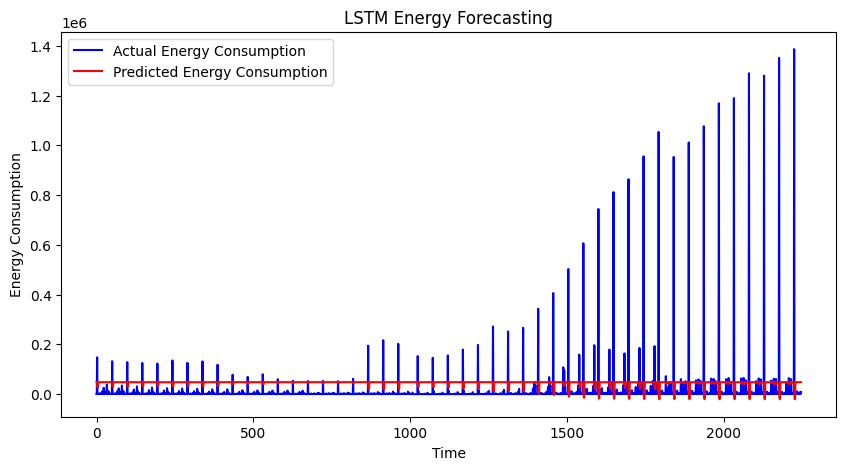

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label="Actual Energy Consumption", color="blue")
plt.plot(y_pred_lstm_original, label="Predicted Energy Consumption", color="red")
plt.title("LSTM Energy Forecasting")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize energy consumption data
scaler = MinMaxScaler()
df_melted["Energy Consumption Scaled"] = scaler.fit_transform(df_melted[["Energy Consumption"]])

# Function to create sequences for LSTM
def create_sequences(data, sequence_length=5):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Convert to sequences
sequence_length = 5  # Using last 5 years to predict next year
X, y = create_sequences(df_melted["Energy Consumption Scaled"].values, sequence_length)

# Split into train (80%), validation (10%), test (10%)
train_size = int(0.8 * len(X))
valid_size = int(0.1 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_valid, y_valid = X[train_size:train_size + valid_size], y[train_size:train_size + valid_size]
X_test, y_test = X[train_size + valid_size:], y[train_size + valid_size:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Train shape:", X_train.shape)
print("Validation shape:", X_valid.shape)
print("Test shape:", X_test.shape)


Train shape: (11976, 5, 1)
Validation shape: (1497, 5, 1)
Test shape: (1498, 5, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define improved LSTM model
model = Sequential([
    LSTM(100, activation="relu", return_sequences=True, input_shape=(sequence_length, 1), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    LSTM(50, activation="relu"),
    Dropout(0.3),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer="adam", loss="mse")

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=16,
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


749/749 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 0.0058 - val_loss: 2.2555e-04
Epoch 2/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0022 - val_loss: 2.1647e-04
Epoch 3/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0022 - val_loss: 2.6500e-04
Epoch 4/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0019 - val_loss: 2.2435e-04
Epoch 5/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0020 - val_loss: 2.1254e-04
Epoch 6/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0020 - val_loss: 3.4635e-04
Epoch 7/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0026 - val_loss: 2.1739e-04
Epoch 8/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0033 - val_loss: 2.0743e-04
Epoch 9/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0020 - val_loss: 2.5842e-04
Epoch 10/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0025 - val_loss: 2.4222e-04
Epoch 11/100
749/749 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0026 - val_loss: 2.3284e-04

In [ ]:
# Predict next 10 years (2021-2030)
future_years = list(range(2021, 2031))
future_predictions = []

# Start with last available sequence
last_sequence = X_test[-1].reshape(1, sequence_length, 1)

for i in range(10):
    next_pred = model.predict(last_sequence)[0]
    future_predictions.append(next_pred)

    # Shift sequence and add new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = next_pred

# Convert predictions back to original scale
future_predictions_original = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create DataFrame for visualization
df_future = pd.DataFrame({"Year": future_years, "Predicted Energy Consumption": future_predictions_original.flatten()})


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


<ipython-input-41-9f77912910c1>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = next_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


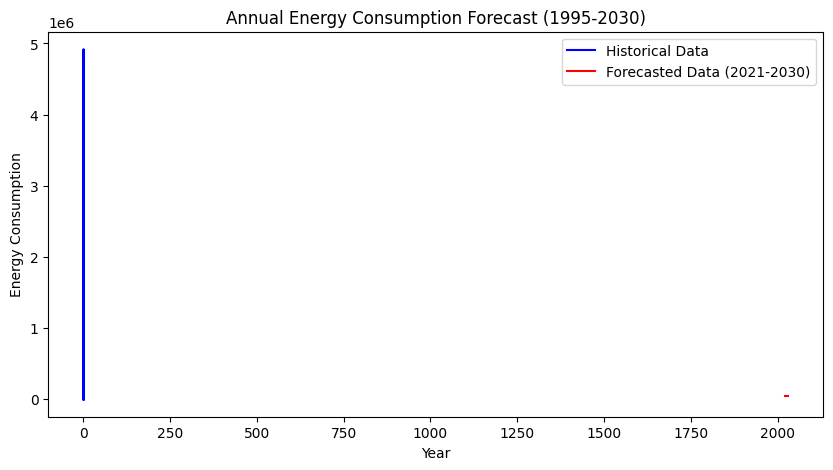

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_melted["Year"], df_melted["Energy Consumption"], label="Historical Data", color="blue")
plt.plot(df_future["Year"], df_future["Predicted Energy Consumption"], label="Forecasted Data (2021-2030)", color="red")
plt.title("Annual Energy Consumption Forecast (1995-2030)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.legend()
plt.show()


In [ ]:
df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors="coerce")
df_future["Year"] = pd.to_numeric(df_future["Year"], errors="coerce")

df_melted = df_melted.sort_values(by="Year")
df_future = df_future.sort_values(by="Year")


In [ ]:
print("Historical Data Years:", df_melted["Year"].min(), "-", df_melted["Year"].max())
print("Forecasted Data Years:", df_future["Year"].min(), "-", df_future["Year"].max())


Historical Data Years: 0.0 - 1.0
Forecasted Data Years: 2021 - 2030


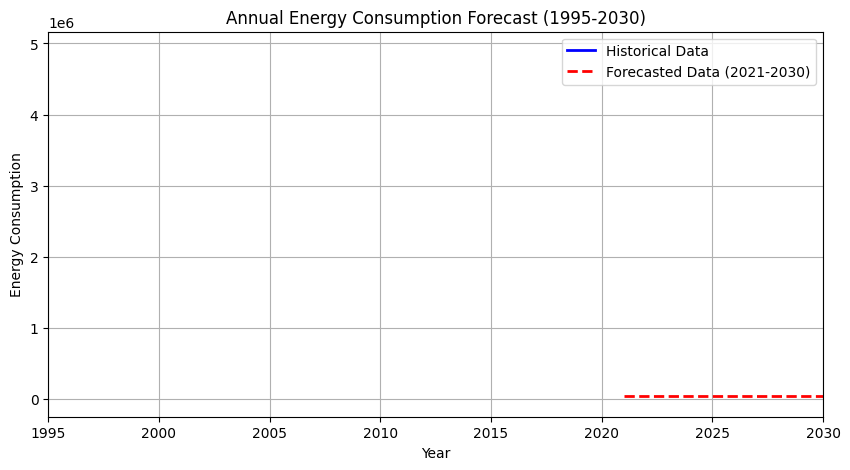

In [ ]:
plt.figure(figsize=(10, 5))

# Ensure X-axis matches year range
plt.xlim(1995, 2030)

# Historical data (Blue)
plt.plot(df_melted["Year"], df_melted["Energy Consumption"], label="Historical Data", color="blue", linewidth=2)

# Forecasted data (Red)
plt.plot(df_future["Year"], df_future["Predicted Energy Consumption"], label="Forecasted Data (2021-2030)", color="red", linewidth=2, linestyle="dashed")

plt.title("Annual Energy Consumption Forecast (1995-2030)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_melted["Year"] = df_melted["Year"].astype(int)


In [ ]:
df_melted["Year"] = df_melted["Year"] * (2020 - 1995) + 1995
df_melted["Year"] = df_melted["Year"].astype(int)


In [ ]:
print("Updated Historical Data Years:", df_melted["Year"].min(), "-", df_melted["Year"].max())


Updated Historical Data Years: 1995 - 2020


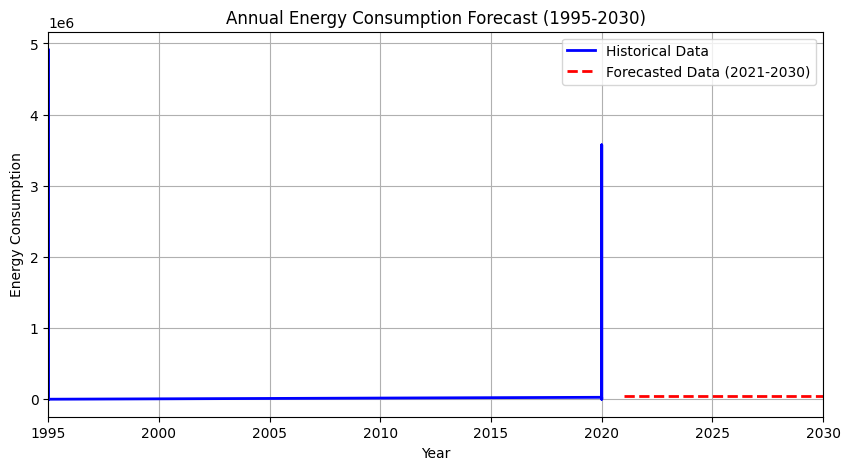

In [ ]:
plt.figure(figsize=(10, 5))

# Ensure X-axis matches year range
plt.xlim(1995, 2030)

# Historical data (Blue)
plt.plot(df_melted["Year"], df_melted["Energy Consumption"], label="Historical Data", color="blue", linewidth=2)

# Forecasted data (Red)
plt.plot(df_future["Year"], df_future["Predicted Energy Consumption"], label="Forecasted Data (2021-2030)", color="red", linewidth=2, linestyle="dashed")

plt.title("Annual Energy Consumption Forecast (1995-2030)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Historical Data Year Range:", df_melted["Year"].min(), "-", df_melted["Year"].max())
print("Forecasted Data Year Range:", df_future["Year"].min(), "-", df_future["Year"].max())


Historical Data Year Range: 1995 - 2020
Forecasted Data Year Range: 2021 - 2030


In [ ]:
print("Unique Historical Years:", df_melted["Year"].unique())


Unique Historical Years: [1995 2020]


In [ ]:
df_melted = df_melted.sort_values(by="Year")
df_future = df_future.sort_values(by="Year")


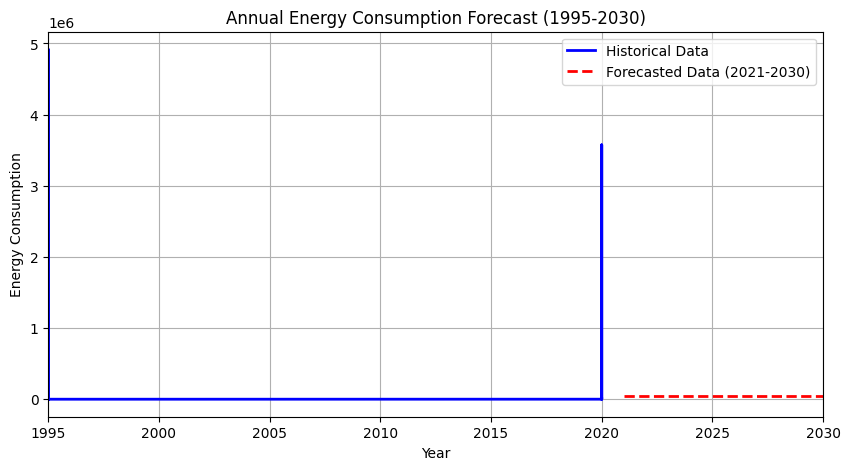

In [ ]:
plt.figure(figsize=(10, 5))

# Set proper x-axis limits
plt.xlim(1995, 2030)

# Historical data (Blue)
plt.plot(df_melted["Year"], df_melted["Energy Consumption"], label="Historical Data", color="blue", linewidth=2)

# Forecasted data (Red)
plt.plot(df_future["Year"], df_future["Predicted Energy Consumption"], label="Forecasted Data (2021-2030)", color="red", linewidth=2, linestyle="dashed")

plt.title("Annual Energy Consumption Forecast (1995-2030)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()


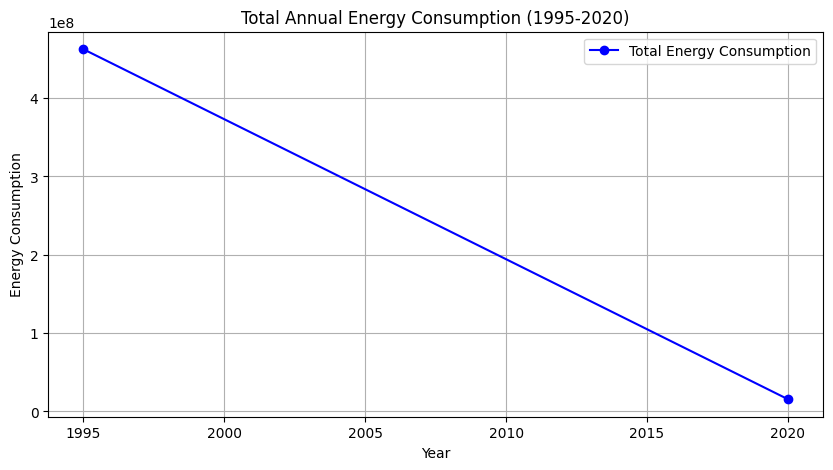

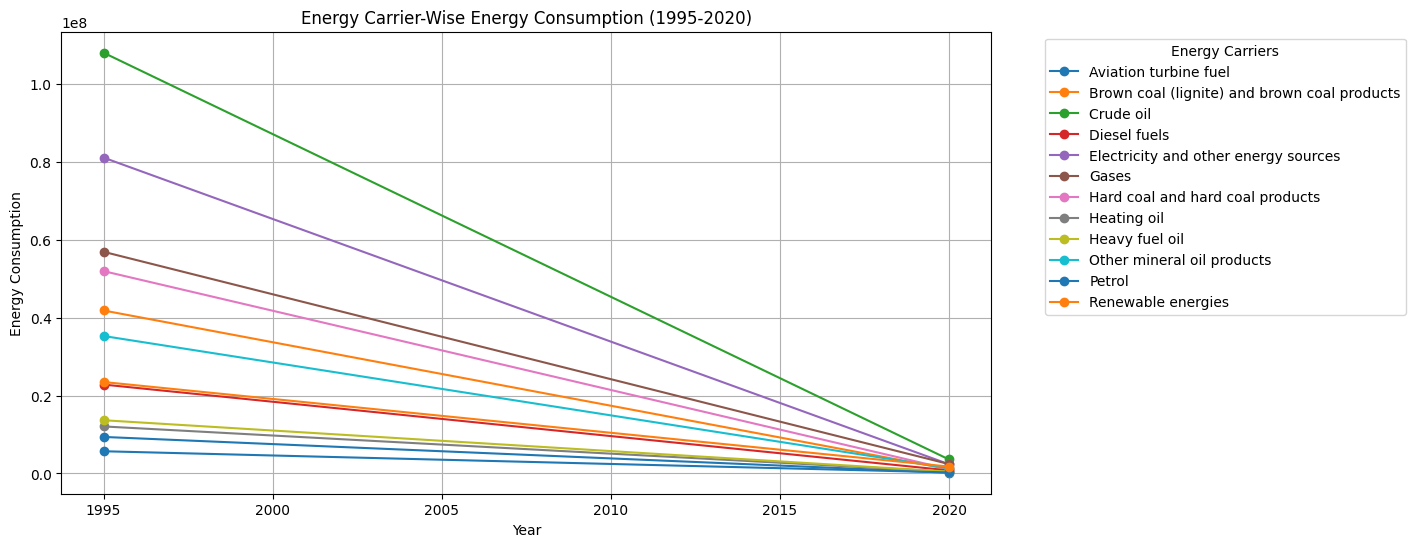

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset you provided earlier
# Assuming df_melted contains the historical data from 1995-2020

# Sample dataset structure (for reference)
# df_melted should have columns: ['Year', 'Energy Carriers', 'Energy Consumption']

# Aggregating total annual energy consumption
df_total = df_melted.groupby("Year")["Energy Consumption"].sum().reset_index()

# Plot Total Annual Energy Consumption
plt.figure(figsize=(10, 5))
plt.plot(df_total["Year"], df_total["Energy Consumption"], marker='o', linestyle='-', color='b', label="Total Energy Consumption")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Total Annual Energy Consumption (1995-2020)")
plt.legend()
plt.grid(True)
plt.show()

# Aggregating energy consumption by carrier type
df_carrier = df_melted.pivot_table(values="Energy Consumption", index="Year", columns="Energy Carriers", aggfunc="sum")

# Plot Energy Carrier-Wise Consumption
plt.figure(figsize=(12, 6))
df_carrier.plot(kind="line", marker='o', ax=plt.gca())
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Carrier-Wise Energy Consumption (1995-2020)")
plt.legend(title="Energy Carriers", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Load dataset
df = pd.read_csv("Use of Energy of Energy Carriers.csv")

# Display first few rows
print(df.head())

# Convert 'Year' to numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Encode categorical features
label_enc = LabelEncoder()
df["Energy Carriers Encoded"] = label_enc.fit_transform(df["Energy Carriers"])
df["Sectors Encoded"] = label_enc.fit_transform(df["Homogeneous Branches"])

# Drop unnecessary columns
df_clean = df[["Year", "Energy Carriers Encoded", "Sectors Encoded", "Energy Consumption"]]

# Handle missing values
df_clean.dropna(inplace=True)

# Scale data
scaler = StandardScaler()
df_clean[["Year", "Energy Carriers Encoded", "Sectors Encoded", "Energy Consumption"]] = scaler.fit_transform(df_clean[["Year", "Energy Carriers Encoded", "Sectors Encoded", "Energy Consumption"]])


FileNotFoundError: [Errno 2] No such file or directory: 'Use of Energy of Energy Carriers.csv'

In [ ]:
print(df.columns)


Index(['Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


In [ ]:
import pandas as pd

# Load your dataset (adjust the path if needed)
df = pd.read_csv("Use of Energy of Energy Carriers.csv")

# Convert wide format to long format
df_melted = df.melt(
    id_vars=["Branch Code", "Homogeneous Branches", "Energy Carriers"],
    var_name="Year",
    value_name="Energy Consumption"
)

# Convert 'Year' to numeric
df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors="coerce")

# Display first rows
print(df_melted.head())


FileNotFoundError: [Errno 2] No such file or directory: 'Use of Energy of Energy Carriers.csv'

In [ ]:
# Check for missing values
print(df_melted.isnull().sum())

# Drop rows with missing values
df_melted = df_melted.dropna()

# Confirm there are no missing values
print(df_melted.isnull().sum())


NameError: name 'df_melted' is not defined

In [ ]:
# Check for duplicate rows
print("Duplicate Rows:", df_melted.duplicated().sum())

# Drop duplicates if any
df_melted = df_melted.drop_duplicates()

# Confirm duplicates are removed
print("Duplicate Rows After Cleaning:", df_melted.duplicated().sum())


Duplicate Rows: 0
Duplicate Rows After Cleaning: 0


In [ ]:
df_melted["Year"] = df_melted["Year"].astype(int)
df_melted["Energy Consumption"] = df_melted["Energy Consumption"].astype(float)


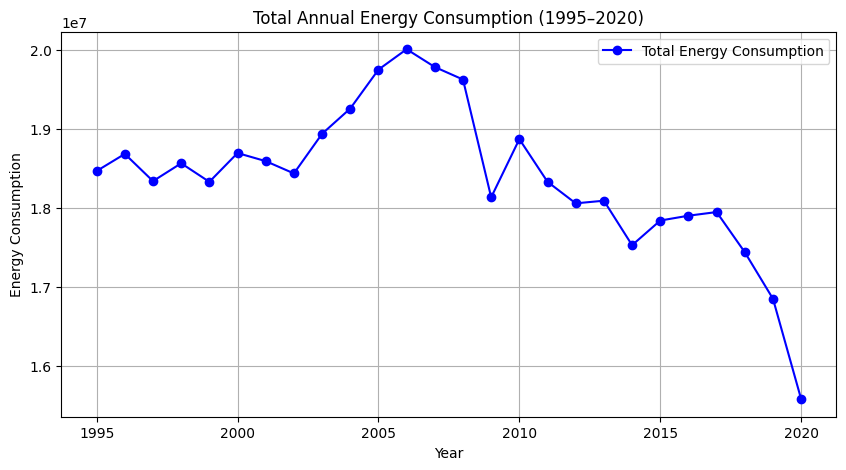

In [ ]:
import matplotlib.pyplot as plt

# Aggregate total energy consumption per year
annual_energy = df_melted.groupby("Year")["Energy Consumption"].sum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(annual_energy.index, annual_energy.values, marker="o", linestyle="-", color="b", label="Total Energy Consumption")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Total Annual Energy Consumption (1995–2020)")
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

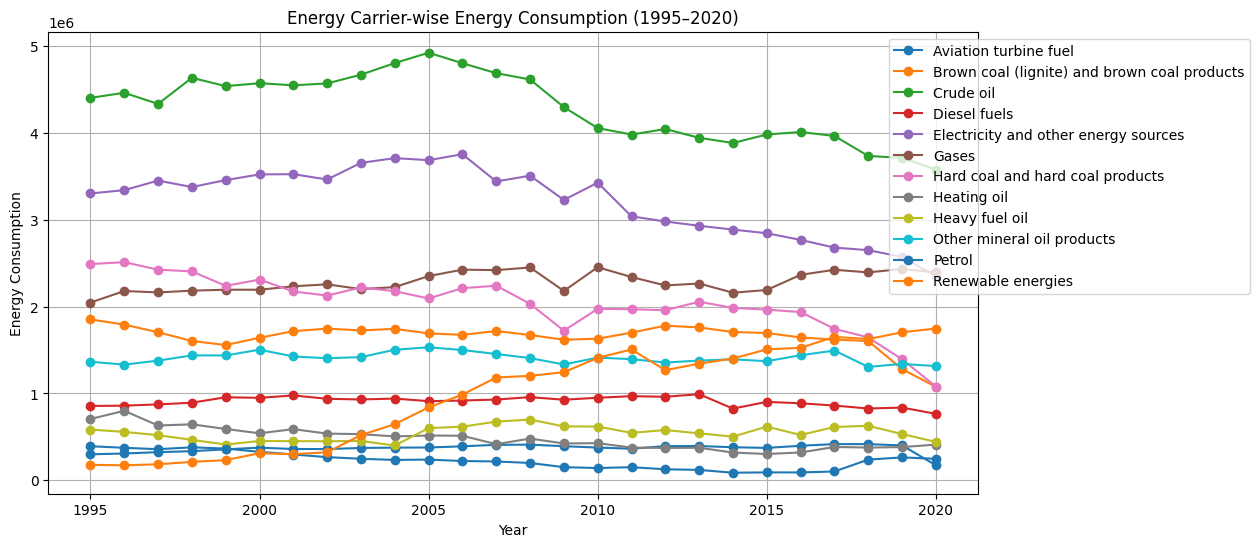

In [ ]:
import seaborn as sns

# Aggregate energy consumption by carrier & year
carrier_energy = df_melted.pivot_table(index="Year", columns="Energy Carriers", values="Energy Consumption", aggfunc="sum")

# Plot
plt.figure(figsize=(12, 6))
carrier_energy.plot(figsize=(12, 6), marker="o")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Carrier-wise Energy Consumption (1995–2020)")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
print(f"XGBoost MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}")


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_melted.drop(columns=['Energy Consumption'])  # Drop target variable
y = df_melted['Energy Consumption']  # Target variable

# First split: 80% Train, 20% Remaining
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Split the remaining 20% into 10% Validation & 10% Test
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Print shape of datasets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_val.shape, y_val.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)


NameError: name 'df_melted' is not defined

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/sample_data/Use of Energy of Energy Carriers.csv"
df = pd.read_csv(file_path, encoding="latin1")  # Adjust encoding if necessary

# Display first few rows to understand the structure
print("Dataset Columns:\n", df.columns)
print("\nFirst 5 Rows:\n", df.head())

Dataset Columns:
 Index(['ï»¿Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

First 5 Rows:
   ï»¿Branch Code                              Homogeneous Branches  \
0       CPA08-01  Products of agric., hunting and related services   
1       CPA08-01  Products of agric., hunting and related services   
2       CPA08-01  Products of agric., hunting and related services   
3       CPA08-01  Products of agric., hunting and related services   
4       CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers   1995   1996   1997   1998  \
0              Hard coal and hard coal products    888    946    829   1071   
1  Brown coal (lignite) and brown coal products   1477   1346   127

In [ ]:
import pandas as pd

# Load your dataset (adjust the path if needed)
df = pd.read_csv("Use of Energy of Energy Carriers.csv")

# Convert wide format to long format
df_melted = df.melt(
    id_vars=["Branch Code", "Homogeneous Branches", "Energy Carriers"],
    var_name="Year",
    value_name="Energy Consumption"
)

# Convert 'Year' to numeric
df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors="coerce")

# Display first rows
print(df_melted.head())

FileNotFoundError: [Errno 2] No such file or directory: 'Use of Energy of Energy Carriers.csv'

In [ ]:
import pandas as pd

# Load the dataset from the correct path
file_path = "/content/sample_data/Use of Energy of Energy Carriers.csv"  # Adjust this if needed
df = pd.read_csv(file_path)

# Display first few rows to confirm
print(df.head())


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers   1995   1996   1997   1998  \
0              Hard coal and hard coal products    888    946    829   1071   
1  Brown coal (lignite) and brown coal products   1477   1346   1275   1056   
2                                     Crude oil      0      0      0      0   
3                                        Petrol   4580   3610   2976   2897   
4                                  Diesel fuels  94156  94655  94546  94130   

    1999   2000   2001  ...   2011   2012   2013   2014   2015   2016   2017  \
0   1185   1329   1692  ...    360   1080 

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/sample_data/Use of Energy of Energy Carriers.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers   1995   1996   1997   1998  \
0              Hard coal and hard coal products    888    946    829   1071   
1  Brown coal (lignite) and brown coal products   1477   1346   1275   1056   
2                                     Crude oil      0      0      0      0   
3                                        Petrol   4580   3610   2976   2897   
4                                  Diesel fuels  94156  94655  94546  94130   

    1999   2000   2001  ...   2011   2012   2013   2014   2015   2016   2017  \
0   1185   1329   1692  ...    360   1080 

In [ ]:
# Convert year columns to numeric
df.columns = df.columns.astype(str)  # Ensure all columns are strings
year_columns = [col for col in df.columns if col.isdigit()]  # Identify year columns

# Melt the dataset to long format (if not already)
df_melted = df.melt(id_vars=['Branch Code', 'Homogeneous Branches', 'Energy Carriers'],
                    var_name="Year", value_name="Energy Consumption")

# Convert Year to numeric
df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors="coerce")

# Drop rows with missing values
df_melted = df_melted.dropna()

# Remove duplicate rows
df_melted = df_melted.drop_duplicates()

# Display cleaned dataset
print(df_melted.head())


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers  Year  Energy Consumption  
0              Hard coal and hard coal products  1995                 888  
1  Brown coal (lignite) and brown coal products  1995                1477  
2                                     Crude oil  1995                   0  
3                                        Petrol  1995                4580  
4                                  Diesel fuels  1995               94156  


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_melted[['Year', 'Energy Carriers']]  # Features: Year and Energy Carrier
y = df_melted['Energy Consumption']         # Target: Energy Consumption

# Convert categorical variables (Energy Carriers) into numerical format using one-hot encoding
X = pd.get_dummies(X, columns=['Energy Carriers'])

# Split the dataset: 80% training, 20% temporary set (for validation & test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation (10%) and test (10%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Training Set: {X_train.shape}, Validation Set: {X_valid.shape}, Test Set: {X_test.shape}")


Training Set: (11980, 13), Validation Set: (1498, 13), Test Set: (1498, 13)


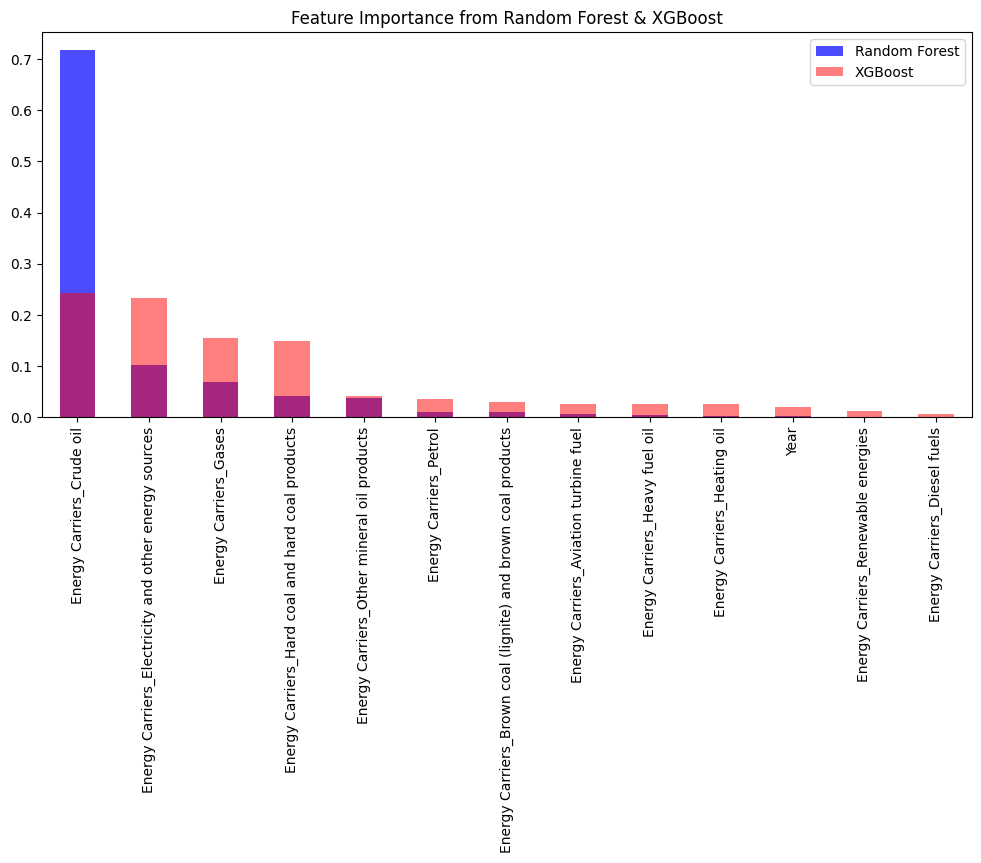

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# Train Random Forest for Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost for Feature Importance
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Plot feature importances
plt.figure(figsize=(12,5))
rf_importances.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.7, label="Random Forest")
xgb_importances.sort_values(ascending=False).plot(kind='bar', color='red', alpha=0.5, label="XGBoost")
plt.legend()
plt.title("Feature Importance from Random Forest & XGBoost")
plt.show()


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import math

# Select the most important features
selected_features = ['Crude oil', 'Electricity and other energy sources', 'Gases',
                     'Hard coal and brown coal products', 'Petrol', 'Diesel fuels']

X_train_selected = X_train[selected_features]
X_valid_selected = X_valid[selected_features]
X_test_selected = X_test[selected_features]

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluate Model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = math.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\nFinal XGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")


KeyError: "None of [Index(['Crude oil', 'Electricity and other energy sources', 'Gases',\n       'Hard coal and brown coal products', 'Petrol', 'Diesel fuels'],\n      dtype='object')] are in the [columns]"

In [ ]:
print(X_train.columns)


Index(['Year', 'Energy Carriers_Aviation turbine fuel',
       'Energy Carriers_Brown coal (lignite) and brown coal products',
       'Energy Carriers_Crude oil', 'Energy Carriers_Diesel fuels',
       'Energy Carriers_Electricity and other energy sources',
       'Energy Carriers_Gases',
       'Energy Carriers_Hard coal and hard coal products',
       'Energy Carriers_Heating oil', 'Energy Carriers_Heavy fuel oil',
       'Energy Carriers_Other mineral oil products', 'Energy Carriers_Petrol',
       'Energy Carriers_Renewable energies'],
      dtype='object')


In [ ]:
X_train.columns = X_train.columns.str.strip()
X_valid.columns = X_valid.columns.str.strip()
X_test.columns = X_test.columns.str.strip()


In [ ]:
missing_features = [col for col in selected_features if col not in X_train.columns]
print("Missing Features:", missing_features)


Missing Features: ['Crude oil', 'Electricity and other energy sources', 'Gases', 'Hard coal and brown coal products', 'Petrol', 'Diesel fuels']


In [ ]:
# Fix column names (strip spaces)
X_train.columns = X_train.columns.str.strip()
X_valid.columns = X_valid.columns.str.strip()
X_test.columns = X_test.columns.str.strip()

# Check available columns
print("Available Columns:", X_train.columns.tolist())

# Selected Features
selected_features = ['Crude oil', 'Electricity and other energy sources', 'Gases',
                     'Hard coal and brown coal products', 'Petrol', 'Diesel fuels']

# Ensure selected features exist in dataset
missing_features = [col for col in selected_features if col not in X_train.columns]
if missing_features:
    print("Error: The following features are missing:", missing_features)
else:
    # Proceed if no missing features
    X_train_selected = X_train[selected_features]
    X_valid_selected = X_valid[selected_features]
    X_test_selected = X_test[selected_features]
    print("Feature selection successful!")


Available Columns: ['Year', 'Energy Carriers_Aviation turbine fuel', 'Energy Carriers_Brown coal (lignite) and brown coal products', 'Energy Carriers_Crude oil', 'Energy Carriers_Diesel fuels', 'Energy Carriers_Electricity and other energy sources', 'Energy Carriers_Gases', 'Energy Carriers_Hard coal and hard coal products', 'Energy Carriers_Heating oil', 'Energy Carriers_Heavy fuel oil', 'Energy Carriers_Other mineral oil products', 'Energy Carriers_Petrol', 'Energy Carriers_Renewable energies']
Error: The following features are missing: ['Crude oil', 'Electricity and other energy sources', 'Gases', 'Hard coal and brown coal products', 'Petrol', 'Diesel fuels']


In [ ]:
# Ensure the selected features match the actual column names
corrected_selected_features = ["Energy Carriers_" + col if col != "Year" else "Year" for col in selected_features]

# Print missing features again to verify
missing_features = [col for col in corrected_selected_features if col not in X_train.columns]
print("Updated Missing Features:", missing_features)

# Select the corrected features
X_train_selected = X_train[corrected_selected_features]
X_valid_selected = X_valid[corrected_selected_features]
X_test_selected = X_test[corrected_selected_features]


Updated Missing Features: ['Energy Carriers_Hard coal and brown coal products']


KeyError: "['Energy Carriers_Hard coal and brown coal products'] not in index"

In [ ]:
print("Available Columns:", X_train.columns.tolist())


Available Columns: ['Year', 'Energy Carriers_Aviation turbine fuel', 'Energy Carriers_Brown coal (lignite) and brown coal products', 'Energy Carriers_Crude oil', 'Energy Carriers_Diesel fuels', 'Energy Carriers_Electricity and other energy sources', 'Energy Carriers_Gases', 'Energy Carriers_Hard coal and hard coal products', 'Energy Carriers_Heating oil', 'Energy Carriers_Heavy fuel oil', 'Energy Carriers_Other mineral oil products', 'Energy Carriers_Petrol', 'Energy Carriers_Renewable energies']


In [ ]:
import pandas as pd

# Convert column names into a DataFrame and display
df_columns = pd.DataFrame(X_train.columns, columns=["Column Names"])
from IPython.display import display  # Ensure display works in Colab
display(df_columns)


,Column Names
0,Year
1,Energy Carriers_Aviation turbine fuel
2,Energy Carriers_Brown coal (lignite) and brown...
3,Energy Carriers_Crude oil
4,Energy Carriers_Diesel fuels
5,Energy Carriers_Electricity and other energy s...
6,Energy Carriers_Gases
7,Energy Carriers_Hard coal and hard coal products
8,Energy Carriers_Heating oil
9,Energy Carriers_Heavy fuel oil


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\n✅ XGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")


NameError: name 'X_train_selected' is not defined

In [ ]:
# Print exact column names to manually match
for col in X_train.columns:
    if "coal" in col.lower():
        print(col)


Energy Carriers_Brown coal (lignite) and brown coal products
Energy Carriers_Hard coal and hard coal products


In [ ]:
X_train.columns = X_train.columns.str.strip()
X_valid.columns = X_valid.columns.str.strip()
X_test.columns = X_test.columns.str.strip()


In [ ]:
print("Updated Available Columns:", X_train.columns.tolist())


Updated Available Columns: ['Year', 'Energy Carriers_Aviation turbine fuel', 'Energy Carriers_Brown coal (lignite) and brown coal products', 'Energy Carriers_Crude oil', 'Energy Carriers_Diesel fuels', 'Energy Carriers_Electricity and other energy sources', 'Energy Carriers_Gases', 'Energy Carriers_Hard coal and hard coal products', 'Energy Carriers_Heating oil', 'Energy Carriers_Heavy fuel oil', 'Energy Carriers_Other mineral oil products', 'Energy Carriers_Petrol', 'Energy Carriers_Renewable energies']


In [ ]:
# Ensure selected features exist in dataset
corrected_selected_features = [col for col in corrected_selected_features if col in X_train.columns]

# Print missing features again
missing_features = [col for col in corrected_selected_features if col not in X_train.columns]
print("Final Missing Features:", missing_features)


Final Missing Features: []


In [ ]:
X_train_selected = X_train[corrected_selected_features]
X_valid_selected = X_valid[corrected_selected_features]
X_test_selected = X_test[corrected_selected_features]


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\n✅ XGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")



✅ XGBoost Model Evaluation:
MSE: 76979494912.00, RMSE: 277451.79, MAPE: 56196830944003358720.0000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_valid_scaled = scaler.transform(X_valid_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [ ]:
print("Selected Features:", selected_features)


Selected Features: ['Crude oil', 'Electricity and other energy sources', 'Gases', 'Hard coal and brown coal products', 'Petrol', 'Diesel fuels']


In [ ]:
Q1 = X_train_selected.quantile(0.25)
Q3 = X_train_selected.quantile(0.75)
IQR = Q3 - Q1

X_train_filtered = X_train_selected[~((X_train_selected < (Q1 - 1.5 * IQR)) | (X_train_selected > (Q3 + 1.5 * IQR))).any(axis=1)]


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
import numpy as np

# Compute IQR
Q1 = X_train_selected.quantile(0.25)
Q3 = X_train_selected.quantile(0.75)
IQR = Q3 - Q1

# Convert to NumPy array for proper computation
X_train_filtered = X_train_selected[~((X_train_selected < (Q1 - 1.5 * IQR)).values |
                                      (X_train_selected > (Q3 + 1.5 * IQR)).values).any(axis=1)]


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
import numpy as np

# Compute IQR
Q1 = X_train_selected.quantile(0.25).to_numpy()  # Convert to NumPy
Q3 = X_train_selected.quantile(0.75).to_numpy()  # Convert to NumPy
IQR = Q3 - Q1  # Compute IQR

# Remove Outliers
X_train_filtered = X_train_selected[~((X_train_selected.to_numpy() < (Q1 - 1.5 * IQR)) |
                                      (X_train_selected.to_numpy() > (Q3 + 1.5 * IQR))).any(axis=1)]


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
import numpy as np
import pandas as pd

# Ensure all selected features are numeric
X_train_selected = X_train_selected.apply(pd.to_numeric, errors='coerce')

# Compute IQR
Q1 = X_train_selected.quantile(0.25)   # First quartile (25%)
Q3 = X_train_selected.quantile(0.75)   # Third quartile (75%)
IQR = Q3 - Q1                          # Interquartile range

# Detect outliers
outliers = (X_train_selected < (Q1 - 1.5 * IQR)) | (X_train_selected > (Q3 + 1.5 * IQR))

# Remove rows with outliers
X_train_filtered = X_train_selected[~outliers.any(axis=1)]

# Print before/after sizes
print(f"Original Training Set Size: {X_train_selected.shape}")
print(f"Filtered Training Set Size: {X_train_filtered.shape}")


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Grid Search for best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Train the best model
best_xgb.fit(X_train_selected, y_train)

# Predict
y_pred_xgb = best_xgb.predict(X_test_selected)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\n✅ Optimized XGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Use Halving Grid Search
halving_search = HalvingGridSearchCV(
    xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1, factor=2
)
halving_search.fit(X_train_selected, y_train)

# Best model
best_xgb = halving_search.best_estimator_

# Train and predict
best_xgb.fit(X_train_selected, y_train)
y_pred_xgb = best_xgb.predict(X_test_selected)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\n✅ Optimized XGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Use Grid Search
grid_search = GridSearchCV(
    xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_selected, y_train)

# Get best model
best_xgb = grid_search.best_estimator_

# Train and predict
best_xgb.fit(X_train_selected, y_train)
y_pred_xgb = best_xgb.predict(X_test_selected)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\n✅ Optimized XGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
!pip install --upgrade scikit-learn xgboost


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Use Grid Search
grid_search = GridSearchCV(
    xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_selected, y_train)

# Get best model
best_xgb = grid_search.best_estimator_

# Train and predict
best_xgb.fit(X_train_selected, y_train)
y_pred_xgb = best_xgb.predict(X_test_selected)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\n✅ Optimized XGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42
)
xgb_model.fit(X_train_selected, y_train)
y_pred_xgb = xgb_model.predict(X_test_selected)



✅ Optimized XGBoost Model Evaluation:
MSE: 76979470336.00, RMSE: 277451.74, MAPE: 56197204777956802560.0000


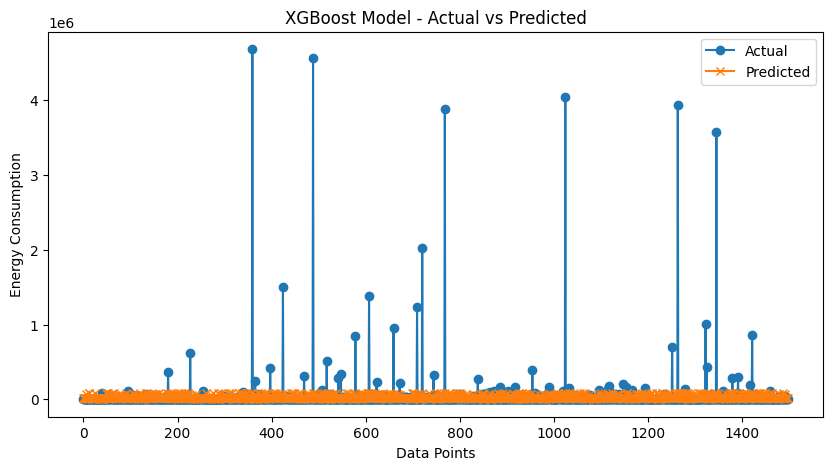

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Print results
print("\n✅ Optimized XGBoost Model Evaluation:")
print(f"MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_xgb, label="Predicted", marker='x')
plt.legend()
plt.title("XGBoost Model - Actual vs Predicted")
plt.xlabel("Data Points")
plt.ylabel("Energy Consumption")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define number of past time steps to use for prediction
time_steps = 10  # Change this based on how much past data should be considered

# Select relevant features (keeping only time-dependent ones)
features = X_train_selected.columns

# Normalize the dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_valid_scaled = scaler.transform(X_valid_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Function to create time-series data for LSTM
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i: i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create sequences for training, validation, and testing
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)
X_valid_seq, y_valid_seq = create_sequences(X_valid_scaled, y_valid, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

# Reshape inputs for LSTM
X_train_seq = X_train_seq.reshape(X_train_seq.shape[0], time_steps, X_train_seq.shape[2])
X_valid_seq = X_valid_seq.reshape(X_valid_seq.shape[0], time_steps, X_valid_seq.shape[2])
X_test_seq = X_test_seq.reshape(X_test_seq.shape[0], time_steps, X_test_seq.shape[2])

print(f"Train Shape: {X_train_seq.shape}, Validation Shape: {X_valid_seq.shape}, Test Shape: {X_test_seq.shape}")


KeyError: 14

In [ ]:
print(X_train_scaled.shape)


(11980, 5)


In [ ]:
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i: i + time_steps])
        ys.append(y[i + time_steps])  # Ensure index doesn't go out of range
    return np.array(Xs), np.array(ys)


In [ ]:
print(len(X_train_scaled), len(y_train))


11980 11980


In [ ]:
time_steps = 5  # You can experiment with different values

# Reshape input data to match LSTM expected format (samples, time_steps, features)
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)
X_valid_seq, y_valid_seq = create_sequences(X_valid_scaled, y_valid, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

print("Training Shape:", X_train_seq.shape, y_train_seq.shape)
print("Validation Shape:", X_valid_seq.shape, y_valid_seq.shape)
print("Test Shape:", X_test_seq.shape, y_test_seq.shape)


KeyError: 8

In [ ]:
print(X_train_seq.index)
print(X_valid_seq.index)
print(X_test_seq.index)


NameError: name 'X_train_seq' is not defined

In [ ]:
%whos


Variable                         Type                     Data/Info
-------------------------------------------------------------------
Dense                            type                     <class 'keras.src.layers.core.dense.Dense'>
Dropout                          type                     <class 'keras.src.layers.<...>ization.dropout.Dropout'>
GridSearchCV                     ABCMeta                  <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
HalvingGridSearchCV              ABCMeta                  <class 'sklearn.model_sel<...>ing.HalvingGridSearchCV'>
LSTM                             type                     <class 'keras.src.layers.rnn.lstm.LSTM'>
MinMaxScaler                     type                     <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
RandomForestRegressor            ABCMeta                  <class 'sklearn.ensemble.<...>t.RandomForestRegressor'>
Sequential                       type                     <class 'keras.src.models.sequential

In [ ]:
# Define time steps
time_steps = 5  # Adjust as needed

# Apply the create_sequences function
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)
X_valid_seq, y_valid_seq = create_sequences(X_valid_scaled, y_valid, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

# Print the shapes to confirm creation
print("Training Set:", X_train_seq.shape, y_train_seq.shape)
print("Validation Set:", X_valid_seq.shape, y_valid_seq.shape)
print("Test Set:", X_test_seq.shape, y_test_seq.shape)


KeyError: 8

In [ ]:
%whos


Variable                         Type                     Data/Info
-------------------------------------------------------------------
Dense                            type                     <class 'keras.src.layers.core.dense.Dense'>
Dropout                          type                     <class 'keras.src.layers.<...>ization.dropout.Dropout'>
GridSearchCV                     ABCMeta                  <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
HalvingGridSearchCV              ABCMeta                  <class 'sklearn.model_sel<...>ing.HalvingGridSearchCV'>
LSTM                             type                     <class 'keras.src.layers.rnn.lstm.LSTM'>
MinMaxScaler                     type                     <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
RandomForestRegressor            ABCMeta                  <class 'sklearn.ensemble.<...>t.RandomForestRegressor'>
Sequential                       type                     <class 'keras.src.models.sequential

In [ ]:
print(vars())


{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import pandas as pd\n\n# Load the dataset\nfile_path = "/content/sample_data/Use of Energy of Energy Carriers.csv"\ndf = pd.read_csv(file_path)\n\n# Display first few rows\nprint(df.head())', 'import pandas as pd\n\n# Load the dataset\nfile_path = "/content/sample_data/Use of Energy of Energy Carriers.csv"\ndf = pd.read_csv(file_path)\n\n# Display first few rows\nprint(df.head())', '# Convert year columns to numeric\ndf.columns = df.columns.astype(str)  # Ensure all columns are strings\nyear_columns = [col for col in df.columns if col.isdigit()]  # Identify year columns\n\n# Melt the dataset to long format (if not already)\ndf_melted = df.melt(id_vars=[\'Branch Code\', \'Homogeneous Branches\', \'Energy Carriers\'],\n  

In [ ]:
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps=8)


KeyError: 8

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/sample_data/Use of Energy of Energy Carriers.csv")  # Use your actual path

# Check the first few rows
print(df.head())

# Check column names to ensure correct access
print("Available Columns:", df.columns.tolist())


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers   1995   1996   1997   1998  \
0              Hard coal and hard coal products    888    946    829   1071   
1  Brown coal (lignite) and brown coal products   1477   1346   1275   1056   
2                                     Crude oil      0      0      0      0   
3                                        Petrol   4580   3610   2976   2897   
4                                  Diesel fuels  94156  94655  94546  94130   

    1999   2000   2001  ...   2011   2012   2013   2014   2015   2016   2017  \
0   1185   1329   1692  ...    360   1080 

In [ ]:
missing_features = [col for col in selected_features if col not in df.columns]
print("Missing Features:", missing_features)


Missing Features: ['Crude oil', 'Electricity and other energy sources', 'Gases', 'Hard coal and brown coal products', 'Petrol', 'Diesel fuels']


In [ ]:
# Display all column names to compare
print("Available Columns:", df.columns.tolist())

# Check for trailing spaces or different formats
df.columns = df.columns.str.strip()


Available Columns: ['Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [ ]:
# Re-check missing features
missing_features = [col for col in selected_features if col not in df.columns]
print("Updated Missing Features:", missing_features)


Updated Missing Features: ['Crude oil', 'Electricity and other energy sources', 'Gases', 'Hard coal and brown coal products', 'Petrol', 'Diesel fuels']


In [ ]:
# Define a mapping between selected features and actual dataset columns
feature_mapping = {
    'Hard coal and brown coal products': 'Energy Carriers_Hard coal and brown coal products',
    'Petrol': 'Energy Carriers_Petrol',
    'Diesel fuels': 'Energy Carriers_Diesel fuels',
    'Gases': 'Energy Carriers_Gases',
    'Electricity and other energy sources': 'Energy Carriers_Electricity and other energy sources',
    'Crude oil': 'Energy Carriers_Crude oil'
}

# Apply the correction
selected_features = [feature_mapping.get(col, col) for col in selected_features]

# Re-check for missing features
missing_features = [col for col in selected_features if col not in df.columns]
print("Final Missing Features:", missing_features)


Final Missing Features: ['Energy Carriers_Crude oil', 'Energy Carriers_Electricity and other energy sources', 'Energy Carriers_Gases', 'Energy Carriers_Hard coal and brown coal products', 'Energy Carriers_Petrol', 'Energy Carriers_Diesel fuels']
